<a href="https://colab.research.google.com/github/shubhkhandare/Brain-Tumor-Detection-with-VGG16/blob/main/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical,plot_model

import numpy as np
import os
import matplotlib.pyplot as plt



In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/brain-tumor-classification-dataset/Training',
    target_size=(224, 224),
    batch_size=64,
    class_mode="categorical" )

validation_generator = validation_datagen.flow_from_directory(
    '/content/brain-tumor-classification-dataset/Testing',
    target_size=(224, 224),
    batch_size=64,
class_mode="categorical")


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:

input_shape = (224, 224, 3)

vgg16_base = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)

vgg16_base.trainable = False


model = Sequential()
model.add(vgg16_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])



In [ ]:

nb_train_samples= 2870
nb_validation_samples= 394
epochs= 30
batch_size= 64

history= model.fit(train_generator,
                   steps_per_epoch= nb_train_samples//batch_size,
                   epochs= epochs,
                   validation_data= validation_generator,
                   validation_steps= nb_validation_samples//batch_size,
                    shuffle= True)

Epoch 1/30
44/44 [==============================] - 61s 1s/step - loss: 0.8940 - accuracy: 0.6258 - val_loss: 1.4348 - val_accuracy: 0.4818
Epoch 2/30
44/44 [==============================] - 40s 901ms/step - loss: 0.5235 - accuracy: 0.8019 - val_loss: 1.4042 - val_accuracy: 0.5807
Epoch 3/30
44/44 [==============================] - 42s 943ms/step - loss: 0.4113 - accuracy: 0.8580 - val_loss: 1.3636 - val_accuracy: 0.6120
Epoch 4/30
44/44 [==============================] - 40s 919ms/step - loss: 0.3624 - accuracy: 0.8696 - val_loss: 1.2410 - val_accuracy: 0.6458
Epoch 5/30
44/44 [==============================] - 40s 914ms/step - loss: 0.3352 - accuracy: 0.8895 - val_loss: 1.4614 - val_accuracy: 0.6667
Epoch 6/30
44/44 [==============================] - 41s 926ms/step - loss: 0.2922 - accuracy: 0.8991 - val_loss: 1.3057 - val_accuracy: 0.6589
Epoch 7/30
44/44 [==============================] - 41s 924ms/step - loss: 0.2903 - accuracy: 0.8913 - val_loss: 1.3142 - val_accuracy: 0.7135
Ep

In [ ]:
model_evaluation= model.evaluate(validation_generator, batch_size = batch_size)


7/7 [==============================] - 2s 231ms/step - loss: 1.5430 - accuracy: 0.7741


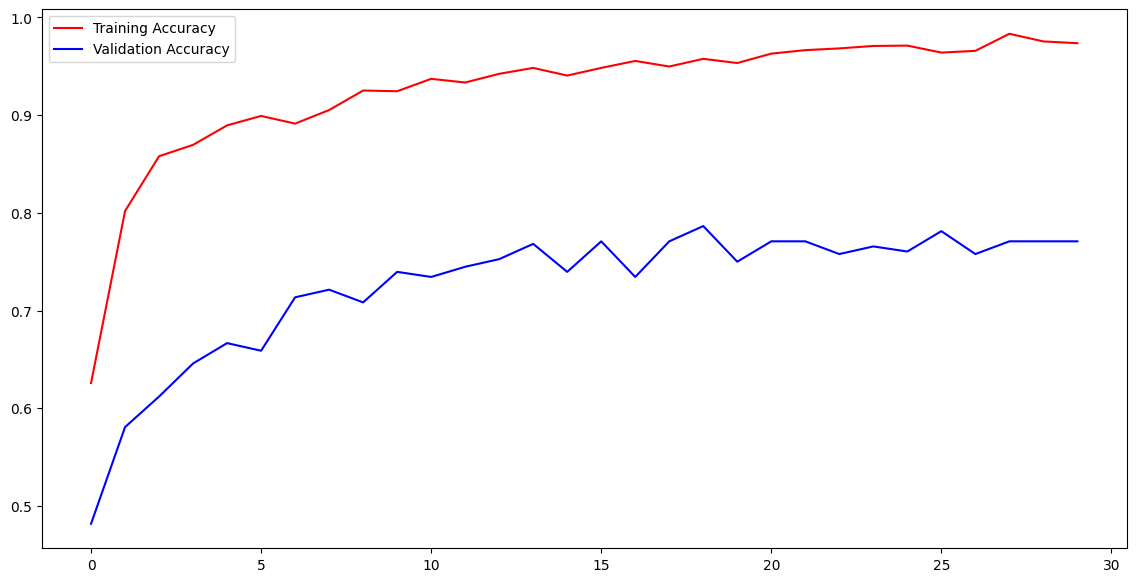

In [ ]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()


In [ ]:
img = cv2.imread('/content/brain-tumor-classification-dataset/Training/meningioma_tumor/m (101).jpg')
img = cv2.resize(img,(224,224))
img_array = np.array(img)
img_array = img_array.reshape(1,224,224,3)
a=model.predict(img_array)

1/1 [==============================] - 0s 31ms/step


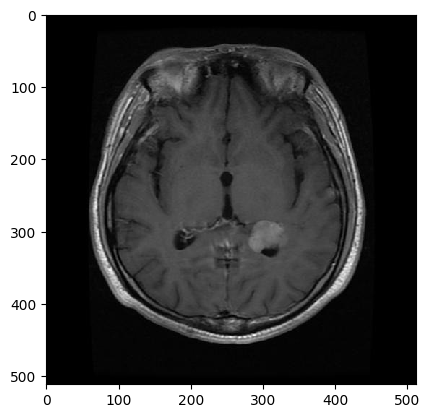

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/brain-tumor-classification-dataset/Training/meningioma_tumor/m (101).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()


if indices==0:
    indices="The image is glima Tumor"
elif indices==1:
    indices="The image is meningioma Tumor"
elif indices==2:
    indices="The image is No Tumor"
else:
    indices="The image is pituitary tumor"

print(indices)



1/1 [==============================] - 0s 18ms/step
The image is meningioma Tumor
